In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [16]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:10<00:00, 111MB/s]
100% 1.06G/1.06G [00:10<00:00, 109MB/s]


In [17]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [18]:
# Generators - divide data batch wise
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
# Normalize each array value from 0 - 1

def process(img, label):
  img = tf.cast(img/255, tf.float32)
  return img, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

MessageError: ignored

In [21]:
# Buliding model
# 3 layers system

model = Sequential()

# 32 filters
model.add(Conv2D(32, kernel_size = (3,3) , padding = "valid" , activation = "relu" , input_shape = (256,256,3) ))
model.add(MaxPooling2D(pool_size= (2,2) , strides = 2 , padding = "valid"))

# 64 filters
model.add(Conv2D(64, kernel_size = (3,3) , padding = "valid" , activation = "relu"))
model.add(MaxPooling2D(pool_size= (2,2) , strides = 2 , padding = "valid"))

# 128 filters
model.add(Conv2D(128, kernel_size = (3,3) , padding = "valid" , activation = "relu"))
model.add(MaxPooling2D(pool_size= (2,2) , strides = 2 , padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dense(62, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 85ms/step - loss: 0.6095 - accuracy: 0.6571 - val_loss: 0.5206 - val_accuracy: 0.7452
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.4745 - accuracy: 0.7739 - val_loss: 0.4881 - val_accuracy: 0.7788
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3610 - accuracy: 0.8388 - val_loss: 0.5465 - val_accuracy: 0.7870
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.2346 - accuracy: 0.9007 - val_loss: 0.7435 - val_accuracy: 0.7852
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1304 - accuracy: 0.9497 - val_loss: 0.8938 - val_accuracy: 0.7892
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0769 - accuracy: 0.9735 - val_loss: 1.1816 - val_accuracy: 0.7836
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0603 - accuracy: 0.9790 - val_loss: 1.1653 - val_accuracy:

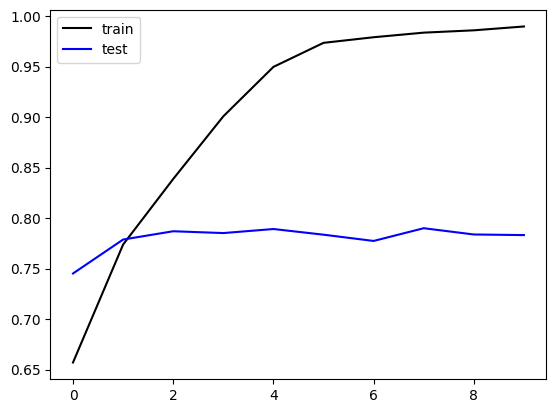

In [25]:
# plotting some outputs
a = history.history['accuracy']
b = history.history['val_accuracy']

import matplotlib.pyplot as plt

plt.plot(a, color = "black" , label = "train")
plt.plot(b, color = "blue" , label = "test")
plt.legend()
plt.show()

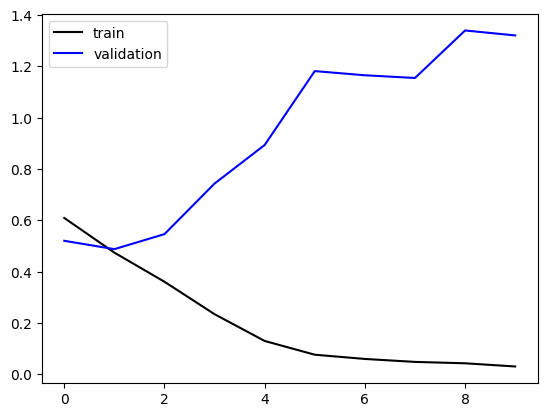

In [26]:
plt.plot(history.history['loss'],color='black',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
# How we can increase accuracy ?
# (1) DroupOut & Batch Norm
# (2) Data Augmentation

from keras.layers import BatchNormalization,Dropout


In [28]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [32]:
history2 = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 105ms/step - loss: 0.8327 - accuracy: 0.5638 - val_loss: 0.6552 - val_accuracy: 0.5972
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6722 - accuracy: 0.5844 - val_loss: 0.6204 - val_accuracy: 0.6488
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6270 - accuracy: 0.6553 - val_loss: 0.6103 - val_accuracy: 0.6670
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5650 - accuracy: 0.7132 - val_loss: 0.5907 - val_accuracy: 0.6936
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5199 - accuracy: 0.7471 - val_loss: 0.7360 - val_accuracy: 0.6160
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4667 - accuracy: 0.7814 - val_loss: 0.4985 - val_accuracy: 0.7710
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4245 - accuracy: 0.8098 - val_loss: 0.5614 - val_ac

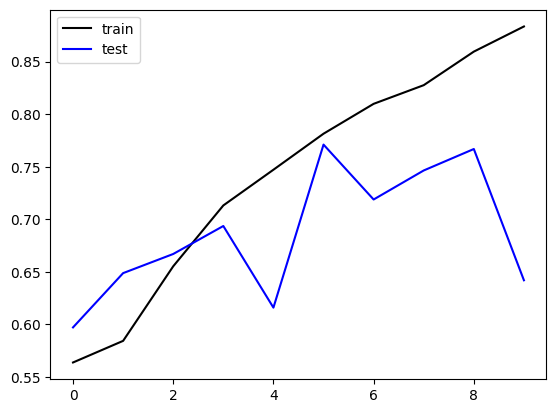

In [39]:
# Plotting Updated Outputs

a = history2.history['accuracy']
b = history2.history['val_accuracy']

import matplotlib.pyplot as plt

plt.plot(a, color = "black" , label = "train")
plt.plot(b, color = "blue" , label = "test")
plt.legend()
plt.show()

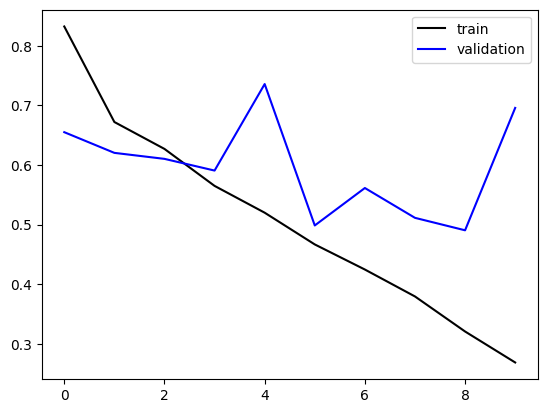

In [40]:
plt.plot(history2.history['loss'],color='black',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

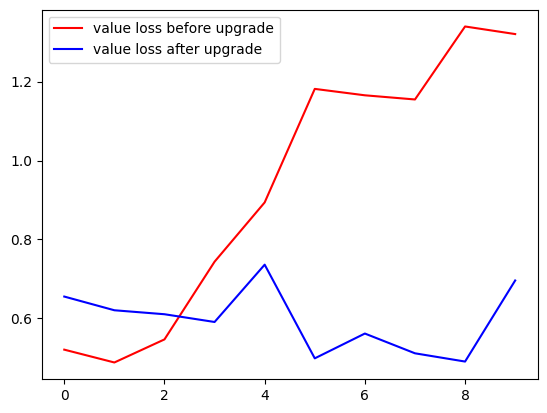

In [44]:
plt.plot(history.history['val_loss'],color='red',label='value loss before upgrade')
plt.plot(history2.history['val_loss'],color='blue',label='value loss after upgrade')
plt.legend()
plt.show()

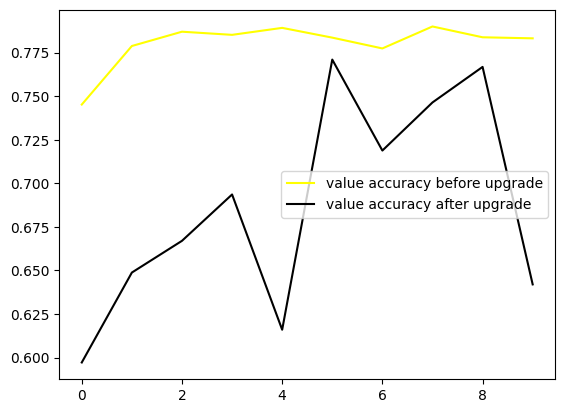

In [45]:
plt.plot(history.history['val_accuracy'],color='yellow',label='value accuracy before upgrade')
plt.plot(history2.history['val_accuracy'],color='black',label='value accuracy after upgrade')
plt.legend()
plt.show()

# Test on a particular data


In [66]:
import cv2
testimg1 = cv2.imread('/content/kutta2.webp')


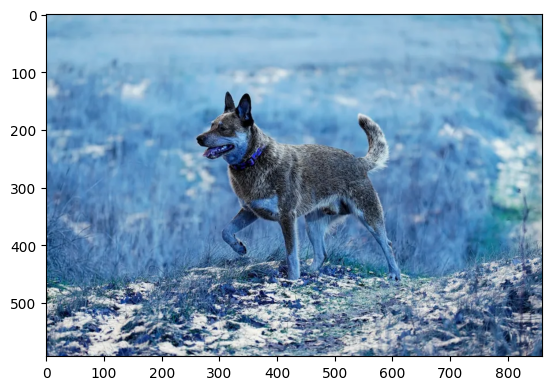

In [67]:
plt.imshow(testimg1)

In [68]:
testimg1.shape

(593, 860, 3)

In [69]:
test = cv2.resize(testimg1, (256,256))

In [70]:
test_input = test.reshape((1,256,256,3))

In [71]:
test_input.shape

(1, 256, 256, 3)

In [72]:
model.predict(test_input)
# 0 represents cat

1/1 [==============================] - 0s 18ms/step


array([[0.27231103]], dtype=float32)